In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import lmdiag

Problem 2. Use “Carseats” dataset
with this command: !curl -O https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv

In [12]:
seats = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv")
seats

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


a) Fit a multiple regression model to predict “Sales” using “Price”, “Urban”, and “US”. 

In [13]:
seats['Urban'] = seats['Urban'].apply(lambda x: 1 if x == 'Yes' else 0)
seats['US'] = seats['US'].apply(lambda x: 1 if x == 'Yes' else 0)

model = smf.ols(formula='Sales ~ Price + Urban + US', data=seats)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        21:53:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

 b) For which of the predictors can you reject the null hypothesis?

we can reject the null hypothesis for the Price and US predictors

c) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome. 

In [15]:
model = smf.ols(formula='Sales ~ Price + US', data=seats)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        12:36:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

d) How well do the models in a) and c) fit the data? 

For model a:
R2
 = 0.239
adjusted R2
 = 0.234

 For model e:
R2
 = 0.239
adjusted R2
 = 0.235


 In this case e is better model

e) Using the model from c), obtain 95% confidence intervals for the coefficient(s)

               0.025      0.975
Intercept     11.790      14.271
Price         -0.065      -0.044
US             0.692       1.708

 f) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. 

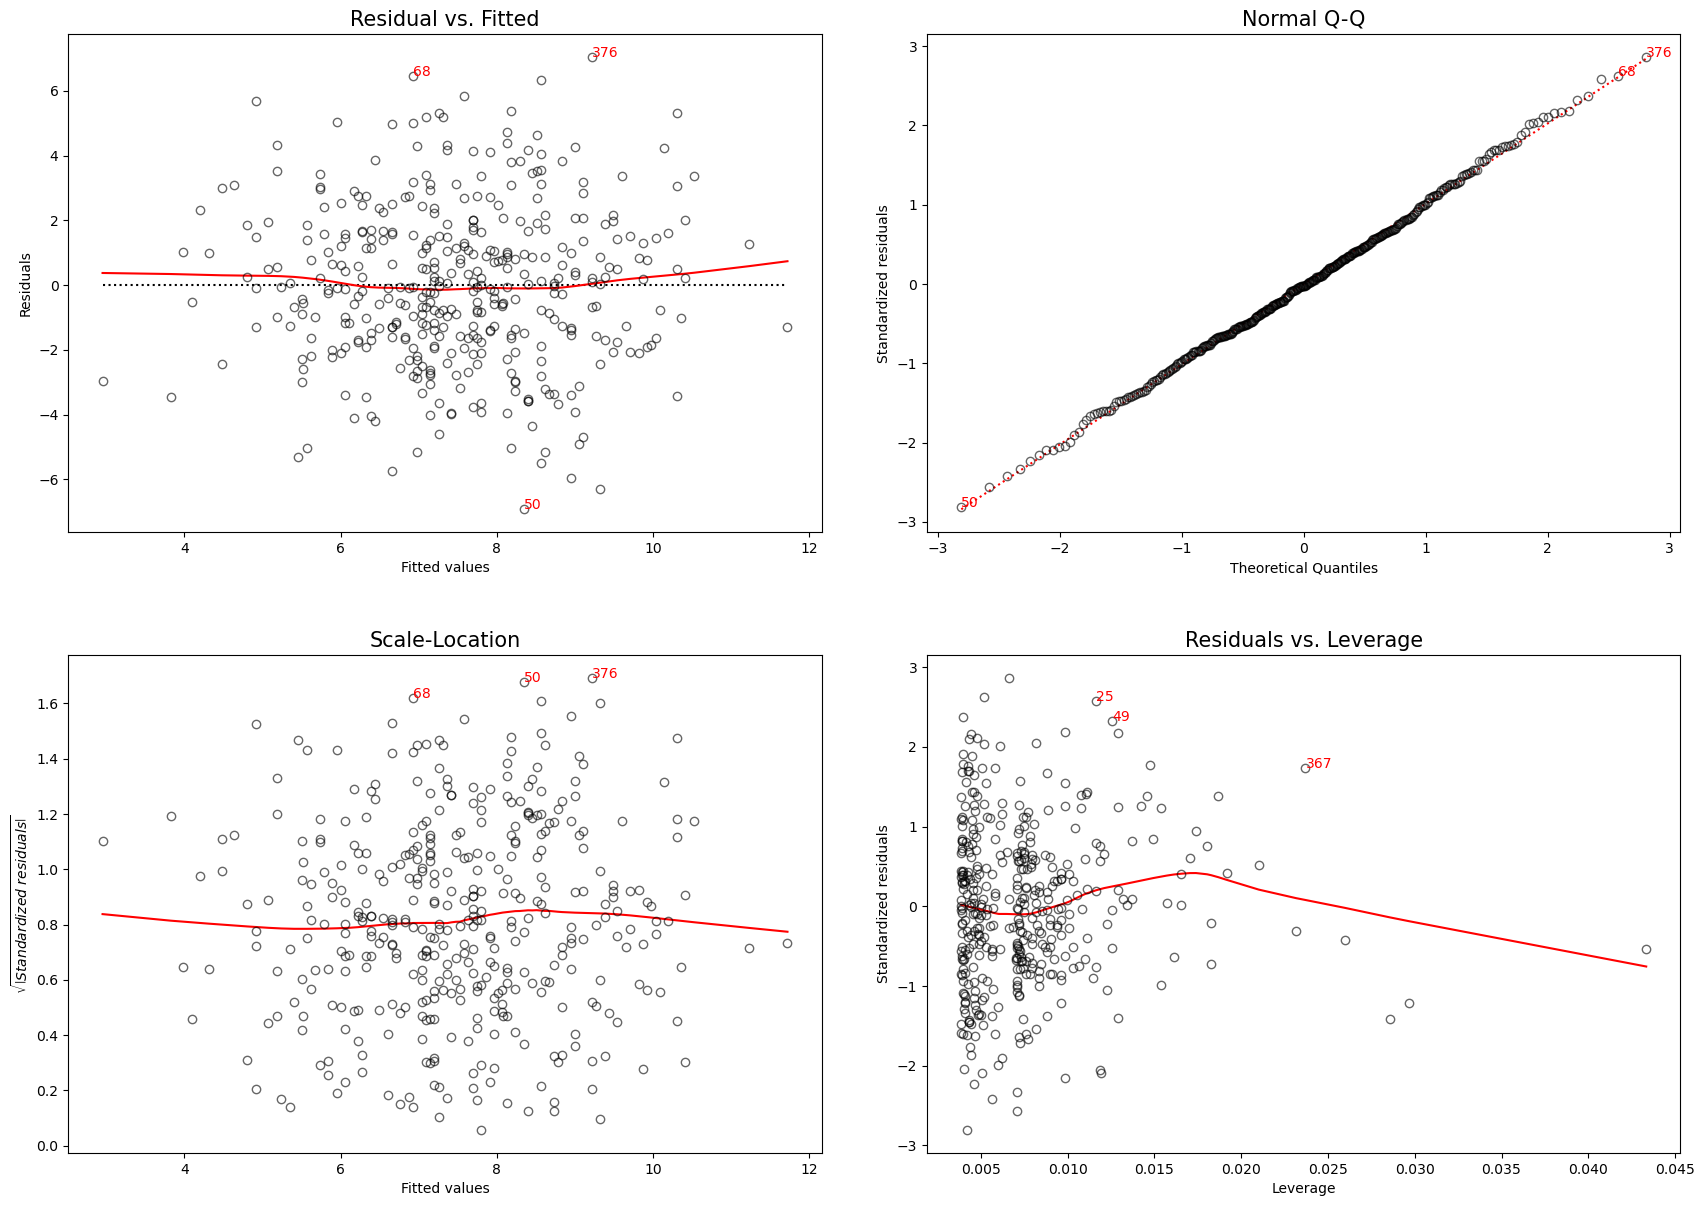

In [22]:
plt.figure(figsize = (17,12))
lmdiag.plot(res)
plt.show()

g) Do you see any outliers or leverage points?